<a href="https://colab.research.google.com/github/Misery-1015/ML/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn
zhfont = matplotlib.font_manager.FontProperties(fname='SimHei .ttf')

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
df.tail

In [ ]:
df.info()

In [ ]:
y=df.iloc[0:100,4].values
print(y)

In [ ]:
y=np.where(y=='Iris-setosa',-1,1)
print(y)

In [ ]:
x = df.iloc[0:100,[0,2]].values
print(x)

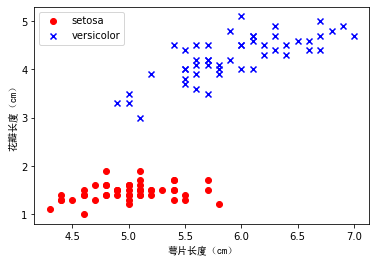

In [31]:
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus']=False
plt.scatter(x[:50,0],x[:50,1],color='red',marker='o',label='setosa')
plt.scatter(x[50:100,0],x[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel(u'萼片长度（cm）',fontproperties=zhfont)
plt.ylabel(u'花瓣长度（cm）',fontproperties=zhfont)
plt.legend(loc='upper left')
plt.show()

In [41]:
class Perceptron():
  def __init__(self,eta=0.01,n_iter=50,random_state=1) -> None:
    self.eta=eta
    self.n_iter =n_iter
    self.random_state = random_state

  def net_input(self,x):
    # print(x)
    # print(self.w_[1:])
    # print(np.dot(x,self.w_[1:]) + self.w_[0])
    return np.dot(x,self.w_[1:]) + self.w_[0]

  def predict(self,x):
    return np.where(self.net_input(x) >= 0.0 ,1,-1)

  def fit(self,x,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_=rgen.normal(loc=0.0, scale=0.01,size=1+x.shape[1])
    self.errors_ = []
    for i in range(self.n_iter):
      errors = 0
      for xi, target in zip(x,y):
        # print(xi)
        update = self.eta * (target - self.predict(xi))
        self.w_[1:]+=update*xi
        self.w_[0]+=update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

In [42]:
ppn=Perceptron(eta=0.1,n_iter=10)
ppn.fit(x,y)

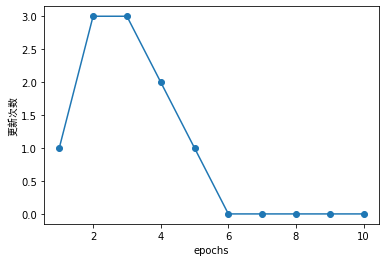

In [43]:
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('epochs')
plt.ylabel(u'更新次数',fontproperties=zhfont)
plt.show()